In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\Users\Meet\Downloads\Marketing_Analysis (1).csv")
df.head()

,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no


In [3]:
df=pd.read_csv(r"C:\Users\Meet\Downloads\Marketing_Analysis (1).csv", skiprows=2)
df.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [4]:
# Drop the customer id as it is of no use.
df.drop('customerid', axis = 1, inplace = True)

#Extract job  & Education in newly from "jobedu" column.
df['job']= df["jobedu"].apply(lambda x: x.split(",")[0])
df['education']= df["jobedu"].apply(lambda x: x.split(",")[1])

# Drop the "jobedu" column from the dataframe.
df.drop('jobedu', axis = 1, inplace = True)

# Printing the Dataset
df

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,60000,825,married,yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes,technician,tertiary
45207,71.0,55000,1729,divorced,yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes,retired,primary
45208,72.0,55000,5715,married,yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes,retired,secondary
45209,57.0,20000,668,married,yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no,blue-collar,secondary


### Data cleaning

In [5]:
# Checking the missing values
df.isnull().sum()

age          20
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month        50
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

In [6]:
# Dropping the records with age missing in data dataframe.
df = df[~df.age.isnull()].copy()

# Checking the missing values in the dataset.
df.isnull().sum()

age           0
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month        50
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

In [7]:
# Find the mode of month in data
month_mode = df.month.mode()[0]

# Fill the missing values with mode value of month in data.
df.month.fillna(month_mode, inplace = True)

# Let's see the null values in the month column.
df.month.isnull().sum()

0

In [8]:
#drop the records with response missing in data.
df = df[~df.response.isnull()].copy()
# Calculate the missing values in each column of data frame
df.isnull().sum()

age          0
salary       0
balance      0
marital      0
targeted     0
default      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
job          0
education    0
dtype: int64

In [9]:
df.describe()

,age,salary,balance,day,campaign,pdays,previous
count,45161.000000,45161.000000,45161.000000,45161.000000,45161.000000,45161.000000,45161.000000
mean,40.935763,57004.849317,1362.850690,15.807024,2.763358,40.182015,0.580014
std,10.618790,32087.698810,3045.939589,8.322754,3.096964,100.079372,2.303563
min,18.000000,0.000000,-8019.000000,1.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,63.000000,871.000000,275.000000


<AxesSubplot:xlabel='balance'>

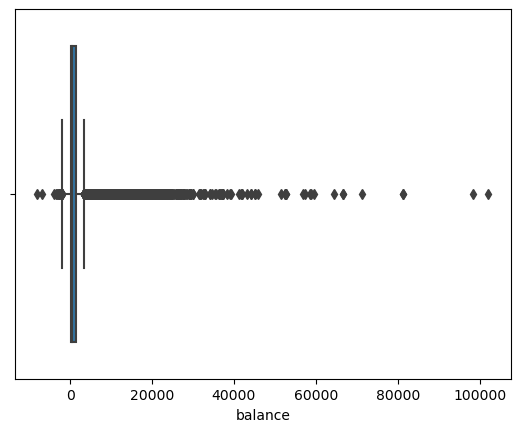

In [10]:
sns.boxplot(df['balance'])

<AxesSubplot:xlabel='campaign'>

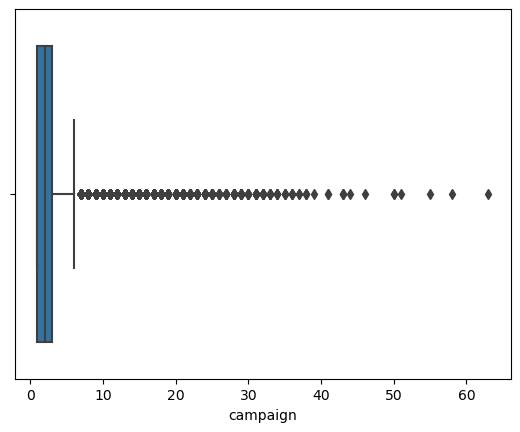

In [11]:
sns.boxplot(df['campaign'])

<AxesSubplot:xlabel='balance'>

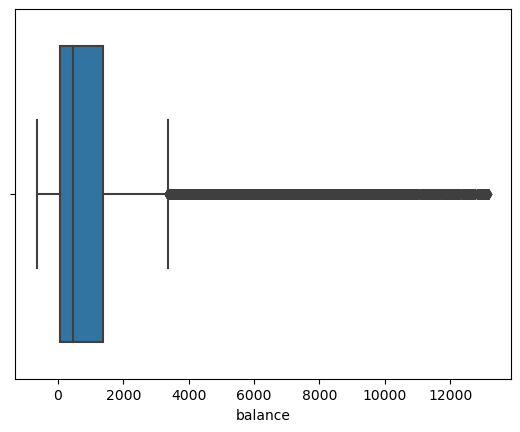

In [12]:
q_low = df['balance'].quantile(0.01)
q_hi  = df['balance'].quantile(0.99)

df_filtered = df[(df['balance'] < q_hi) & (df['balance'] > q_low)]
sns.boxplot(df_filtered['balance'])

<AxesSubplot:xlabel='campaign'>

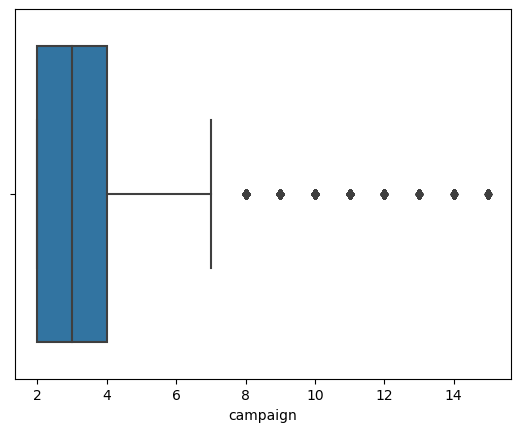

In [13]:
q_low = df_filtered['campaign'].quantile(0.01)
q_hi  = df_filtered['campaign'].quantile(0.99)

df_filtered = df_filtered[(df_filtered['campaign'] < q_hi) & (df_filtered['campaign'] > q_low)]
sns.boxplot(df_filtered['campaign'])

### Univariate analysis

In [14]:
# Let's calculate the percentage of each job status category.
df_filtered.job.value_counts(normalize=True)

blue-collar      0.219834
management       0.213170
technician       0.176537
admin.           0.105531
services         0.089982
retired          0.045894
self-employed    0.034938
entrepreneur     0.032943
housemaid        0.029592
unemployed       0.026769
student          0.018335
unknown          0.006476
Name: job, dtype: float64

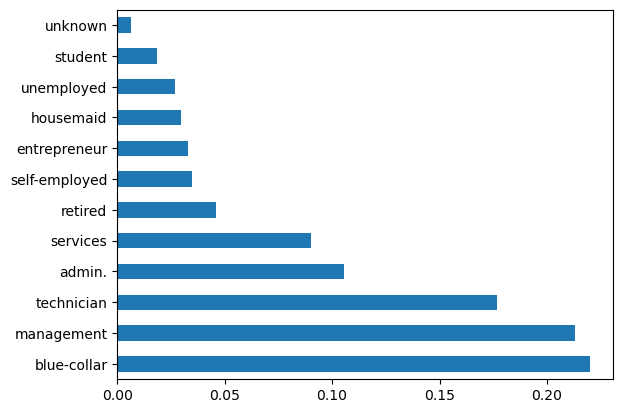

In [15]:
#plot the bar graph of percentage job categories
df_filtered.job.value_counts(normalize=True).plot.barh()
plt.show()

In [16]:
#calculate the percentage of each education category.
df_filtered.education.value_counts(normalize=True)

secondary    0.507586
tertiary     0.295207
primary      0.157487
unknown      0.039720
Name: education, dtype: float64

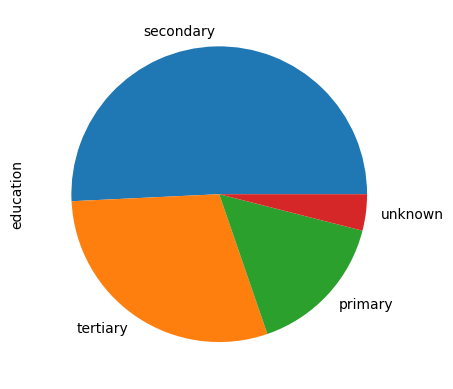

In [17]:
#plot the pie chart of education categories
df_filtered.education.value_counts(normalize=True).plot.pie()
plt.show()

In [18]:
df_filtered.salary.describe()

count     26561.000000
mean      57215.729829
std       32169.392274
min           0.000000
25%       20000.000000
50%       60000.000000
75%       70000.000000
max      120000.000000
Name: salary, dtype: float64

### Bivariate analysis

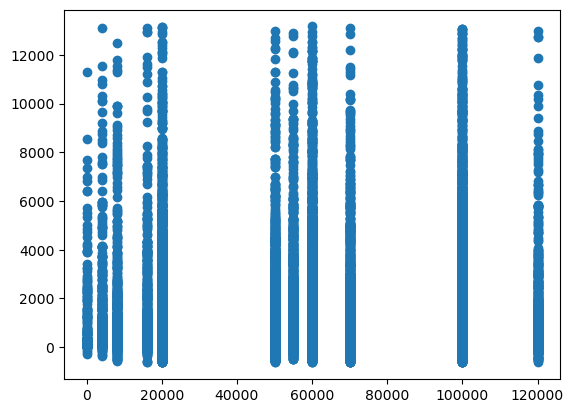

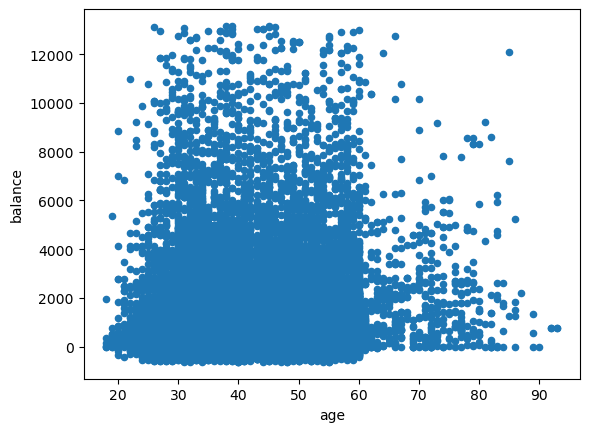

In [19]:
#plot the scatter plot of balance and salary variable in data
plt.scatter(df_filtered.salary,df_filtered.balance)
plt.show()

#plot the scatter plot of balance and age variable in data
df_filtered.plot.scatter(x="age",y="balance")
plt.show()

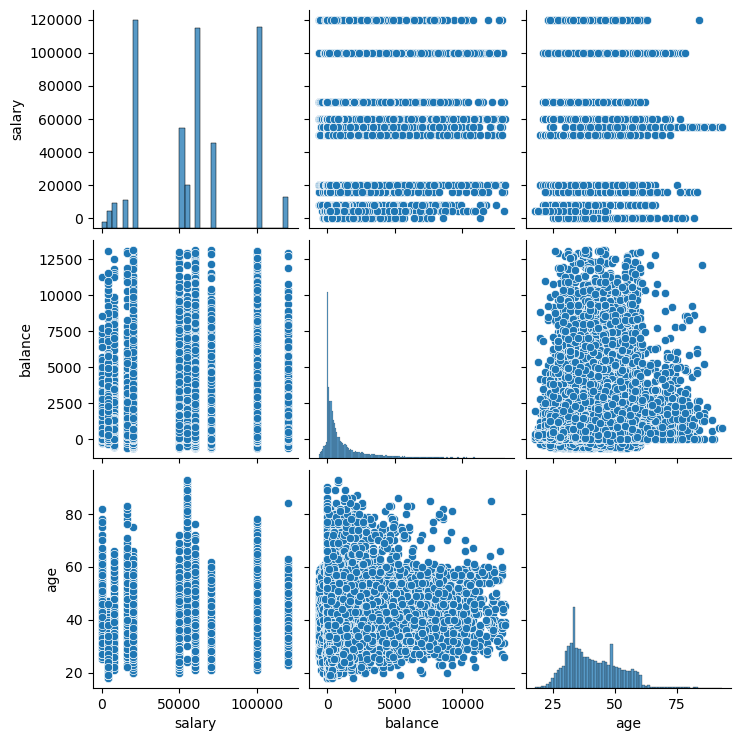

In [20]:
#plot the pair plot of salary, balance and age in data dataframe.
sns.pairplot(data = df_filtered, vars=['salary','balance','age'])
plt.show()

In [21]:
# Creating a matrix using age, salry, balance as rows and columns
df_filtered[['age','salary','balance']].corr()

,age,salary,balance
age,1.000000,0.012067,0.102178
salary,0.012067,1.000000,0.044641
balance,0.102178,0.044641,1.000000


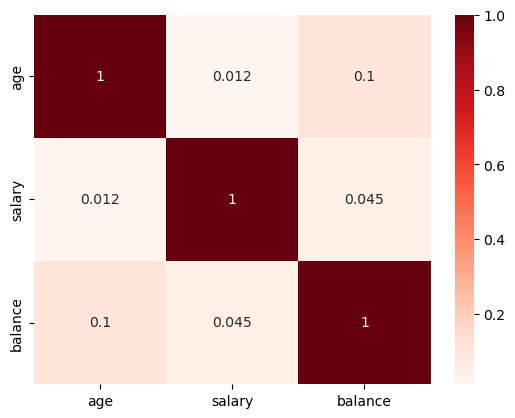

In [22]:
#plot the correlation matrix of salary, balance and age in data dataframe.
sns.heatmap(df_filtered[['age','salary','balance']].corr(), annot=True, cmap = 'Reds')
plt.show()

In [23]:
#groupby the response to find the mean of the salary with response no & yes separately.
df_filtered.groupby('response')['salary'].mean()

response
no     56926.953828
yes    59797.529940
Name: salary, dtype: float64

In [24]:
#groupby the response to find the median of the salary with response no & yes separately.
df_filtered.groupby('response')['salary'].median()

response
no     60000.0
yes    60000.0
Name: salary, dtype: float64

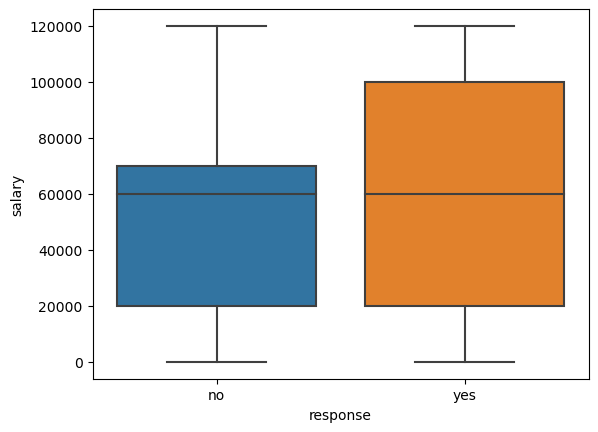

In [25]:
#plot the box plot of salary for yes & no responses.
sns.boxplot(df_filtered.response, df_filtered.salary)
plt.show()

In [26]:
#create response_rate of numerical data type where response "yes"= 1, "no"= 0
df_filtered['response_rate'] = np.where(df_filtered.response=='yes',1,0)
df_filtered.response_rate.value_counts()

0    23889
1     2672
Name: response_rate, dtype: int64

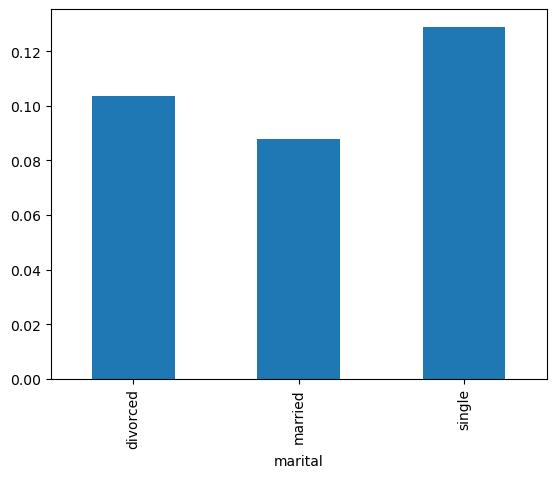

In [27]:
#plot the bar graph of marital status with average value of response_rate
df_filtered.groupby('marital')['response_rate'].mean().plot.bar()
plt.show()

### Multivariate analysis

marital    divorced   married    single
education                              
primary    0.118483  0.068202  0.112554
secondary  0.086792  0.077467  0.106192
tertiary   0.122310  0.119126  0.162102
unknown    0.144444  0.111111  0.136029


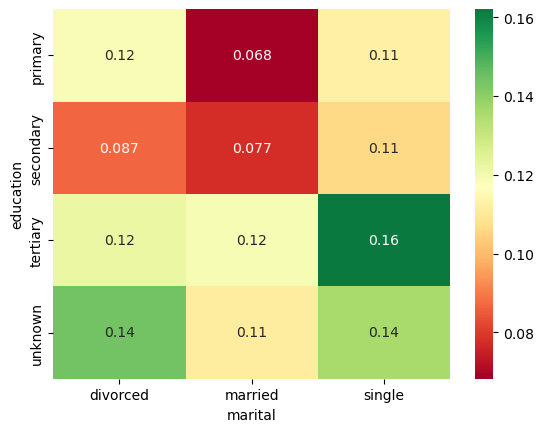

In [28]:
result = pd.pivot_table(data=df_filtered, index='education', columns='marital',values='response_rate')
print(result)

#create heat map of education vs marital vs response_rate
sns.heatmap(result, annot=True, cmap = 'RdYlGn', center=0.117)
plt.show()